## Installing the required libraries:
  1. pip install pandas numpy matplotlib seaborn scikit-learn
  2. Using Dataset - Titanic - Machine Learning from Disaster

# Loading the data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/train.csv')

# Display the first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Understand the Data
  1. Basic Information
  2. Checking for Missing Values



In [19]:
# Check the shape of the dataset
print(df.shape)

# Get column names and data types
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


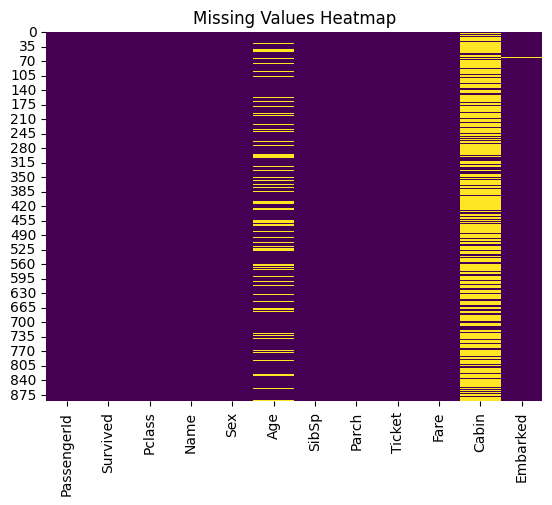

In [20]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Data Cleaning
  1. Handling Missing Values
  2. Drop Unnecessary Columns

In [21]:
# Fill missing 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop unnecessary columns
df = df.drop(['PassengerId',  'Ticket', 'Cabin'], axis=1)

# Verify changes
print(df.isnull().sum())
print(df.head())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  
0    male  22.0      1      0   7.2500        S  
1  female  38.0      1      0  71.2833        C  
2  female  26.0      0      0   7.9250        S  
3  female  35.0      1      0  53.1000        S  
4    male  35.0      0      0   8.0500        S  


# Exploratory Data Analysis (EDA)
  1. Univariate Analysis
  2. Bivariate Analysis
  3. Multivariate Analysis

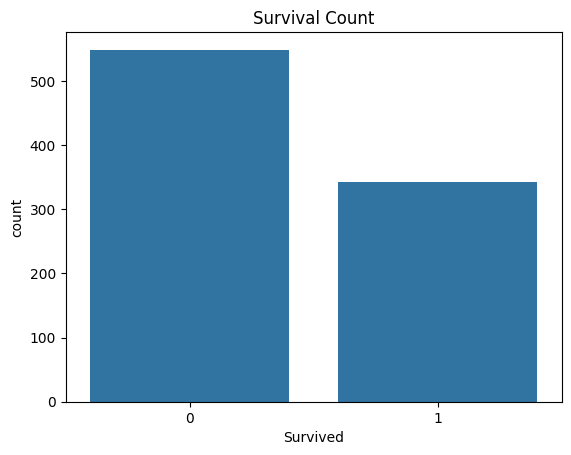

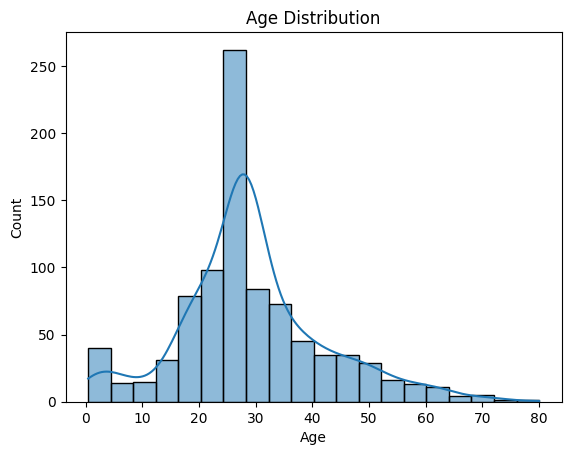

In [22]:
# Distribution of survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Distribution of age
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

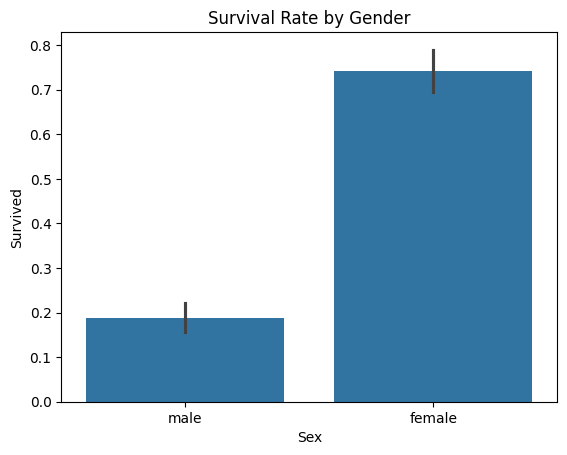

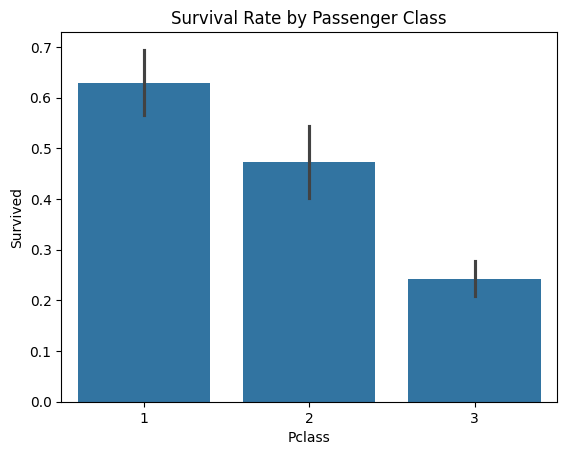

In [23]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

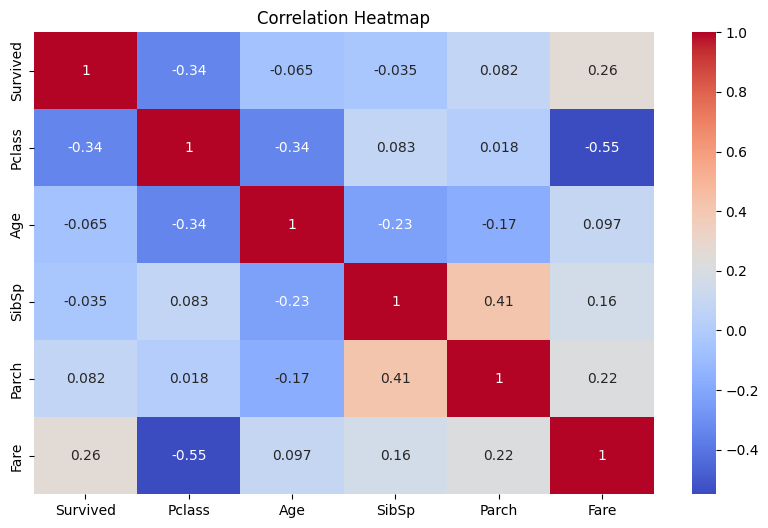

In [24]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Insights and Conclusions
 1. Survival Rate: Only about 38% of passengers survived.
 2. Gender: Females had a significantly higher survival rate than males.
 3. Passenger Class: Passengers in higher classes (1st and 2nd) had a better chance of survival.
 4. Age: Younger passengers had a slightly higher survival rate.
 5. Fare: Higher fare-paying passengers had a better survival rate.

# Expanding it furthur

# Feature Engineering
  1. Family Size
  2. Is Alone
  3. Title Extraction

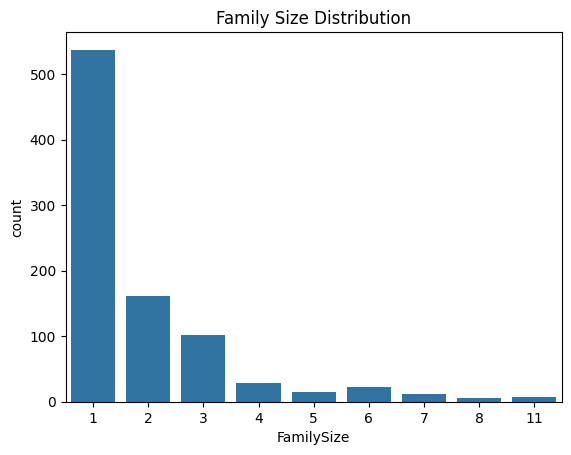

In [25]:
# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger themselves

# Check the distribution of 'FamilySize'
sns.countplot(x='FamilySize', data=df)
plt.title('Family Size Distribution')
plt.show()

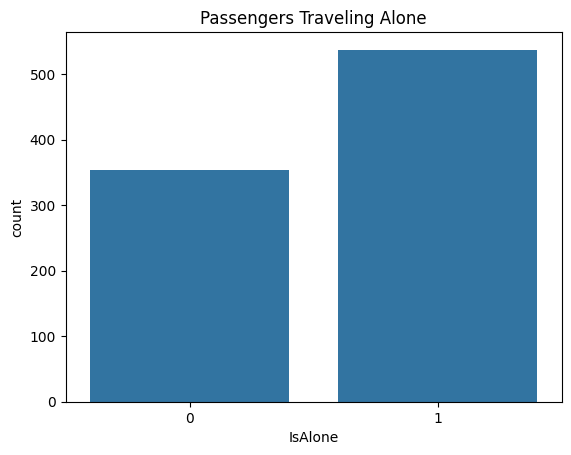

In [26]:
# Create 'IsAlone' feature
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Check the distribution of 'IsAlone'
sns.countplot(x='IsAlone', data=df)
plt.title('Passengers Traveling Alone')
plt.show()

In [27]:
# Extract titles from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check the distribution of titles
print(df['Title'].value_counts())

# Group rare titles into 'Rare'
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Check the updated distribution of titles
print(df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


# Advanced Visualization
  1. Survival Rate by Title
  2. Survival Rate by Family Size
  3. Age Distribution by Survival
  4. Fare Distribution by Passenger Class

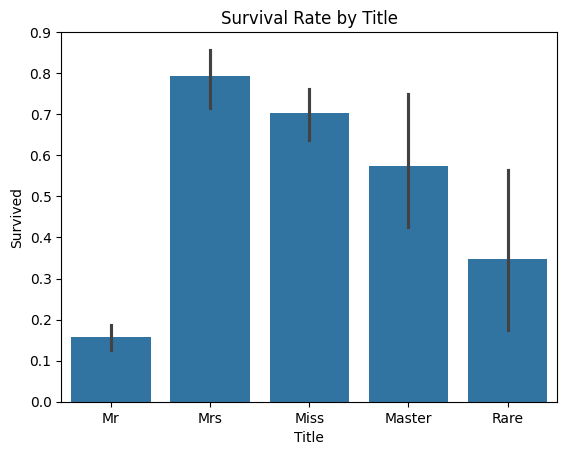

In [28]:
# Survival rate by title
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.show()

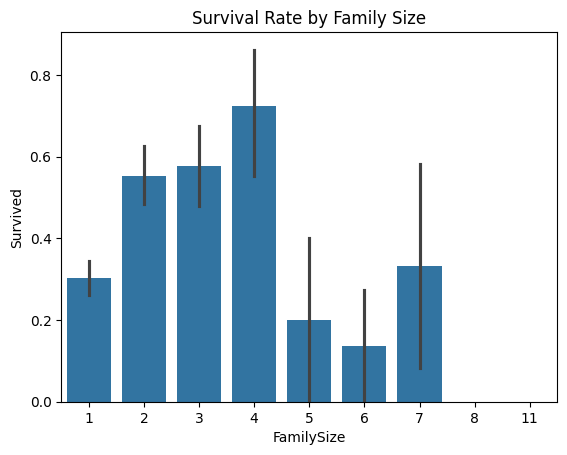

In [29]:
# Survival rate by family size
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

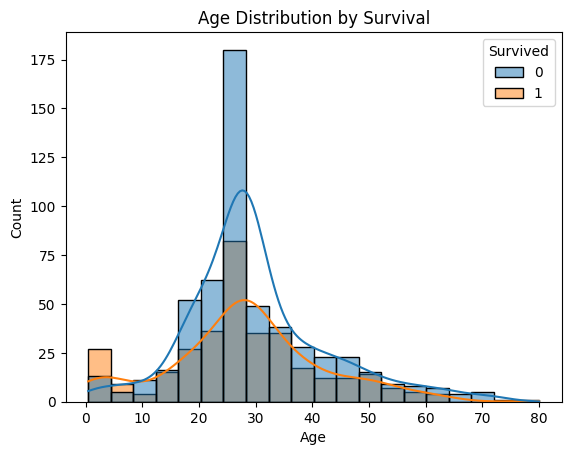

In [30]:
# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Age Distribution by Survival')
plt.show()

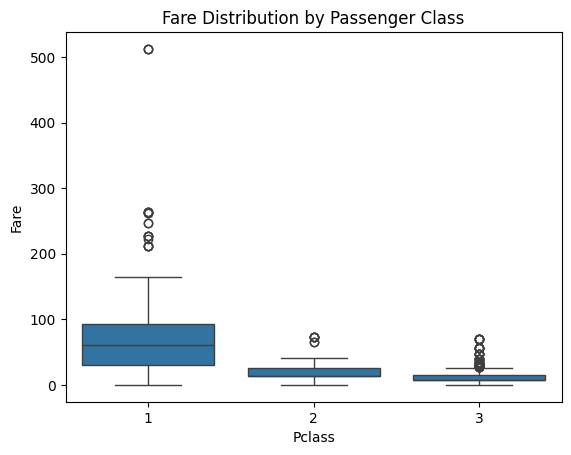

In [31]:
# Fare distribution by passenger class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Explore More Relationships
  1. Survival Rate by Embarked Port
  2. Survival Rate by IsAlone
  3. Survival Rate by Age Group

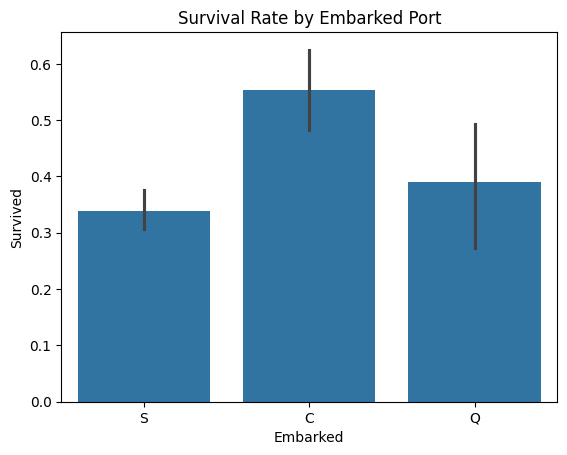

In [32]:
# Survival rate by embarked port
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.show()

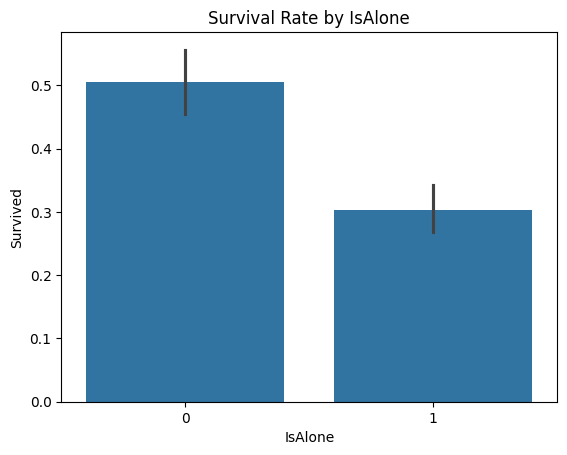

In [33]:
# Survival rate by IsAlone
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate by IsAlone')
plt.show()

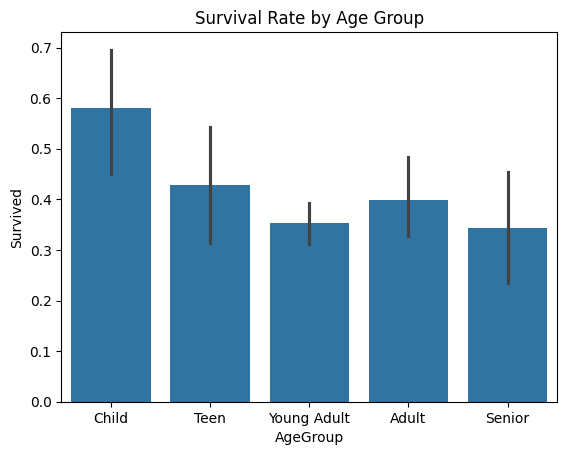

In [34]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

# Final Insights and Conclusions
  1. Family Size: Passengers with a family size of 2–4 had a higher survival rate compared to those traveling alone or with very large families.
  2. Titles: Passengers with titles like "Mrs" or "Miss" had higher survival rates compared to "Mr" or "Rare" titles.
  3. Age Groups: Children had a higher survival rate, while seniors had a lower survival rate.
  4. Embarked Port: Passengers who embarked from port "C" had a higher survival rate compared to ports "S" and "Q".

In [35]:
df.to_csv('updated_titanic.csv', index=False)